In [12]:
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt
from Crypto.Util.number import long_to_bytes,bytes_to_long

In [53]:
unshiftRight = lambda res,next : x^(res>>next)
makeUnshiftLeft = lambda mask: lambda res,next : x^(res << next & mask)
makeList = lambda x: [x for i in range(32)] 

In [503]:
import random
import os
import binascii
import sys

a = int(binascii.hexlify(os.urandom(2500)), 16)
rand = random.Random(a)
flag = "__RS{REDACTEDREDACTEDRED}" #only difference between this and challenge binary is the characters of the flag were replaced with the characters of redacted

def transform(x):
    unshiftRight = lambda res,next : x^(res>>next)
    makeUnshiftLeft = lambda mask: lambda res,next : x^(res << next & mask)
    makeList = lambda x: [x for i in range(32)] 

    x = reduce(unshiftRight, makeList(18))
    x = reduce(makeUnshiftLeft(0xefc60000), makeList(15))
    x = reduce(makeUnshiftLeft(0x9d2c5680), makeList(7))
    x = reduce(unshiftRight, makeList(11))

    return x

def make_plaintext(padlen, num_iters=8):
    #Make sure the padlen is reasonable.
    #We pad num_iters times with padlen repeated random characters 
    if padlen*num_iters > 325:
        padlen = 325//num_iters
        print("Too much padding, shortening padding")
    if padlen < len(flag):
        padlen = len(flag)
        print("Too little padding, lengthening padding")
    
    gen_rand = random.Random()
    padding = ""
    for i in range(num_iters):
        padding += chr(gen_rand.getrandbits(8))*padlen
    
    #Make our message even longer, just to show the strength
    padded_msg = (flag + padding)
    plaintext = padded_msg
    while(len(plaintext) < 2600):
        plaintext += padded_msg[:2600-len(plaintext)]
    return plaintext

def encrypt(plaintext):
    ct = []
    pos = 0
    while pos < len(plaintext):
        rand_int = rand.getrandbits(32)
        trand_int = transform(rand_int)
        for j in range(4):
            if pos >= len(plaintext):
                break
            rand_short = (trand_int >> (j*8)) & 0xff
            ct.append(rand_short ^ ord(plaintext[pos]))
            pos += 1
    return ct


In [500]:
len("RS{REDACTEDREDACTEDRED}")

23

In [507]:
ciphertext = bytes.fromhex("500f56d21927b55d16b90f759781e62455e8f96b353536c5110b99aa9881bd57acc87e55bcbe1a6260031f289f7fcd646887cd94ab41efe6e2c8e93029c1e6b4bbb26dc593fb4a52ef674ea800a87e0bb0ef5186710649e6c91040328a1360bb39a9f0149a7c40bc5968a2594f6d352ae245c0c65a2dfed7e726de35eb7a37c17509f0ef064340fbcc52835ef6cb03a849d6d0aa9cddef6b3fb72eef9fb1f77462d598ab89577e50fff2d9076b4f20d0b750326f5a1ca9e9466be1593e6493922ea88a42340c0b93aa7ce1b953b44876feab5706ae98264f3ac7f1ec16d965ebd3c38f0718fccd692310362be48295df6d15ca1b3d4ab61fa099eb264acec714db73ae385ea04ad68bedf0b00941a02e0b6debd8b8ffc51be8c81bc6ad320c8180a48f142ef869700d12cd6f39c4cab656e94d7f375c4c84a7eebe2a4e535ddc4a883ff3be492749ea82fddd0f3f6c5207f754537d81a028c7668febaf13bc818d9e7f406870c95b503677bd88746bb36bc2ec8fd4fb0b42c637e4fd2b09b17b21cc2c912399d35cc160108ed66c7c4734954f25dbe47ed76e41668da7355a165e3ab2d6b939cb707523e1bd84c9473d1992951be309157181ad32ff96498371ad65ef2b929e1bdd5e6838a0cebe22b2c62522f3e28027a31e8eb34b1919baaf2d39db234d8e2d6c20bb167e35b04339aefdf1f69562e3045fc7fc896dbe89781d2533b2f41b8f86de07445bd4a5855f85d70b483615977f15842fafc19b66e3a00334a686290763c646186618232ee5566bf48fe9e8093b74ea2074711eb2be2601280a8b5231f9ab5b93baa24461dd29e0cada09d9747845a9eb31b76a04d8db09791b145497db2d760b33cc7227d00a250327ade2a35910c3afe020e336f5bf3cb5984766a21c0b4c7c1fa34cc475e3fdd146dfa2369913f1bdac586e43835c2e729a4fb490e97213d7ae11808db34362c12c8bf85944b8e41b3216bc6f250e2e18b335ed55be08b6dfffe6100a7ab1c180b156d09d8e2112234dd8e0ce78d5315c81e5b7ab894f83f8110fdd0cab6a1e5b93abc1e5f0baf335bbf3c203cecb79a55f3a4851857dbb1aaacb80e6c2f8398044aafbf249ff3faf66aa106ab23f9f9307c23f2b2eb222b3c5213677fd59efd5029735d441d1d1afadfacf5801d444bdb73f9e3bb15f7aa19fedd58af82a376deabb485f5f2cf64286fba1c98a68c6064301c7bdb5c14f1abd30d11c393067eb9714aa8d9f966fd0e14786c6ff75b4a3d61185d61753c7cd67033c65dfcf5bbcc8329dc5cae85503a1c0625ecf5171ed248d6ea3ba3ef1906f19562b9b195d37892348d956d8e07403a8954c85ea8f9e0bc18603884875a78f81d5b8bf7b43c56da3b18a9dc4ddce31614c77a882e76e99cee34299d22e8659ee83d8baeb8dc334376295e317cdf8b0c44e95c9c91ffce1da7d50e623a6bbf7a52cd898e0c30cbc7393b5d666685d5b24976d4262405b77e3ee05315be36d09b627c65cc3b76b70502fd860a5a9f2dcf4ef7fb9da623c994d03d4bb2febc052a968a315b6c8983fa5173b103a635fe717645fd39707320c1848a811a07ab74cf7af5f91b106347675acebb5e1cf18926665cf7d6b9340ce0f77f553871f509465765092dfde3a0c975b91e407e0710c8763fd977b650a7d3f46eb1c5af2cf0d6220f013473150942bf42c676ba4e7fa8bef69885a33d0b3deab61250575f2eaf93c7ef72a379bc2b7d930625cb057cdc9af4b112e7e6160fca8daa011aad1116568cee1a87a7209f921757220b579edacdb01cd8a18fc15ddaff775881b9dc56c923b24a5576ff6f60bf28362779834d294c9a164e3aee6cf7f0c292a3d9d106e9e2b52f4b5c1be2b3a679be6f740a630e6098c378f75468581fc7495cf96643d126024b14b94a80bd759e209aeb678ac3528f5deb896e5eb062e63b87bb31010dc8e9b6e3cd66dae149289a7ccc461232061b639170b0b5e55dd59d309397f673e4048482db91dee325c03cecaf50ad7a2a5fdd736e01efe81063845ea3ed7d57e1f6673cb7f92c5155ffec1b0a15157a767a6a0fb3a55d3952559f264461617f4308e09f0704c0012aece504289ad731e4776f209c771abd95d182b027fbff0c0f0d16c4e36bd0d2ee4c80a8c8a737f39d0ab289ebcd785b6537bb352047b8fd8ac557ca1139d61878d969d694cbdf3fdbb512a460a51515d02bc541998fd941b01b9c72b4651c66945f685d44db18a6a259b8a749c9291d2c4a981d05a36568265ec4a752074f2b9867aa09730dcb976a3e788b4aa3f46e067b2b9db6e55010b60259949d27a34903dcfd3dea8fb84e05c4fbfa17d6b7db113dca30631b4e13f0c09a7b0204d78a170aa110155b8405581acea709b0d448cb2d1a9a16cfa8e87a040dd8d66097a0fea23658ab011a99fae4c1213f7131a06535a2b26e2295bf7a5f260e03051aa204fbd092ca40566c64640758740252238f54807d108627f1238e0b01826f096905b15a039eccf9648416c84b1ff9a23a9d736a5cc4a427c60ed2bac351760812a55da8da2d2a79252480782b194a0059ea49dc0751b7d045a34ec2ca7e3db8a765cfdaa28ec6e74128c87511d5a1c2fb68ca9bc5a575050faa8137521e453422bf5d7a8c60fd0c42ebab28295c81db860de7761a9c1f48576530d598d3d9b930c91cc1a9caa7c74eeec1c458a59c6014162f5cea9245e9b6c42fffca175a3b0eb94fa960dd62135be4ef37ef36db2fb84fc408f0ca593655c72f131bfb68d572a824810f8d94db6bcd9b8382e6ec41d8db4a33dd0f247954f0e591ab1d4c54587156638aa073d08db908abda347d67eda6461f5921f680df25c81d3e82f9795350577020357977927c9c85433db1567f3e0ec7f4a3b604278b71cfaf628b6c8487ebbf35cc97b1c53c85cbff38dbaa594d5b3b0d31e67e5dd82cbc8deabfe53534337dce3964e810f2ccec0999b8a418401476d54fdd545917c2d071f7bed0cc53315af9b5dedd5435e3acfa1879edf8206b1abdba60241e1200086500e5231ddaa94a8f3ca3be24f06c205c1392aa1279abe7f3c3c3555afe223794c5594a4787b839f2c8571300373d5bbd7025bb2059decaeb0c6fa5247fb43815d6fe1248cbf3d1fc1ec3a5f4396eb4fa04589ce3d31b42ec68ffdda06e2011ddf745cd68130e0b6f751f2c0b6e4ab60d58660bd7c2874331cfa35494eec5ea78414896bd9c9ca7c05375c9ca5e745ce5776e93fdfd1ff710819bc08cabd0ab574bdfed3d34ed534dec01df3f621c7b58a90703b36776c8ef578df80c8ec4dec7a08ac5a6ed9196f36073002a076572ca8b6c1ff5703382109070ec58ecda45d0f39965f325af33f8efdb1bd1cccbd71ebe2e2b9058d01af1df697bcf8bc41fd9a1ae5f285a6d0d9ab00bcd8e96484ddfa08971ea294b46b7e0d7cc9d9d09caff2f60569f36ee2af7c3e3349b5e20631188c0e61f7c17185d83d44d72feeb6ea3ee673757f03da25651e72b1f90c852a3159eca0fc356e0aedd8066202bc85bf116e29acb480b578bb5c75e5e577bf7784e92972746a9dfc2c98196922996019a54d0d9d6a4f589f15d5e80a5eaa563323d6e8ea147696a2fdbe46edb308241067627a925b4438aed3e1586ee75bc4e92c5bae3e368757")

padlen = 32
i = 36

def _int32(x):
    return x & 0xffffffff

zone1_pad = ciphertext[i:i+24]
zone2_pad = ciphertext[i+397*4:i+397*4+20]
twistflag = ciphertext[i+624*4:i+624*4+20]

for pad1 in range(256):
    for pad2 in range(256):
        
        xor1 = bytes([pad1 ^ zone1_pad[i] for i in range(len(zone1_pad))])
        xor2 = bytes([pad2 ^ zone2_pad[i] for i in range(len(zone2_pad))])
        
        zone1 = []
        zone2 = []
        
        for r in range(6):
            
            zone1.append(bytes_to_long(xor1[r*4:(r+1)*4][::-1]))
            zone2.append(bytes_to_long(xor2[r*4:(r+1)*4][::-1]))
            
        zone3 = []
            
        for m in range(5):
            
            upper = 0x80000000
            lower = 0x7fffffff

            x = _int32((zone1[m] & upper) + (zone1[m+1] & lower))
            
            zone3.append(zone2[m] ^ (x >> 1))

            if x & 1 != 0:
                zone3[m] ^= 0x9908b0df
        
        xorflag = b''
        
        for m3 in zone3:
            
            for mi in range(4):
                
                xorflag += long_to_bytes((m3 >> (mi*8)) & 0xff)
                
        flag = bytes([xorflag[i] ^ twistflag[i] for i in range(len(xorflag))])
        
        if flag[4] == b'}':
            print(flag)
        
        

In [506]:
txt = make_plaintext(36)
for i in range(30,31,20):
    print(txt[i:i+24])
    print(txt[i+397*4:i+397*4+20])
    print(txt[i+624*4:i+624*4+20])
    print()


TypeError: can't concat str to bytes

In [499]:
len("RS{Y0U_4RE_G00D_ABYGRYTHA}")

26

In [502]:
len("RS{Y0U_4RE_G00D_A")

17

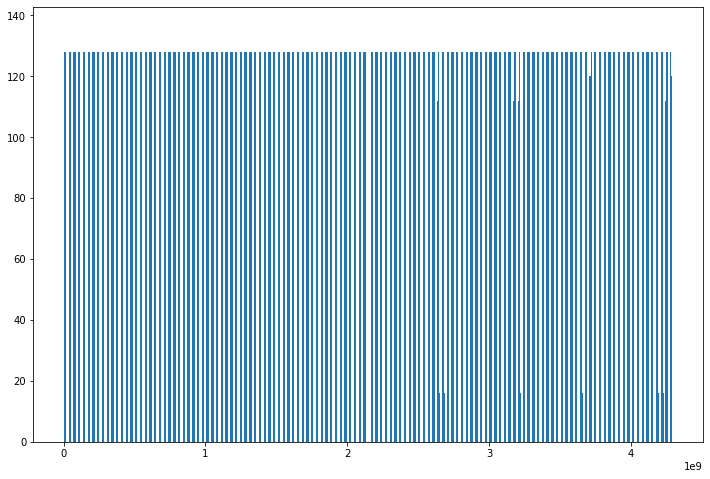

In [26]:
aa = np.zeros(2**16)

for i in range(2**16):
    
    aa[i] = transform(i)
    
plt.figure(figsize=(12,8))

plt.hist(aa,bins=256*4)

plt.show()

In [28]:
transform(70000)

2291143538

In [92]:
class MT19937:
    """Classical Mersenne Twister Implementation."""

    def __init__(self, seed=None):
        self.mt = [0 for i in range(624)]
        self.index = 624
        if seed is not None:
            self.seed(seed)

    def seed(self, seed):
        self.mt[0] = seed
        for i in range(1, 624):
            self.mt[i] = self._int32(0x6c078965 *
                                (self.mt[i - 1] ^ (self.mt[i - 1] >> 30)) + i)

    def extract(self):
        """ Extracts a 32bit word """
        if self.index >= 624:
            self.twist()

        x = self.mt[self.index]
#         x ^= x >> 11
#         x ^= (x << 7) & 0x9d2c5680
#         x ^= (x << 15) & 0xefc60000
#         x ^= x >> 18

        self.index += 1
        return self._int32(x)

    def twist(self):
        """ The twist operation. Advances the internal state """
        for i in range(624):
            upper = 0x80000000
            lower = 0x7fffffff

            x = self._int32((self.mt[i] & upper) +
                            (self.mt[(i + 1) % 624] & lower))
            self.mt[i] = self.mt[(i + 397) % 624] ^ (x >> 1)

            if x & 1 != 0:
                self.mt[i] ^= 0x9908b0df

        self.index = 0

    def _int32(self, x):
        return x & 0xffffffff

In [54]:
x = 3298467503928475
x ^= x >> 18
print(x)
x = reduce(unshiftRight, makeList(18))
print(x)

3298477474047852
3298467503928475


In [93]:
code = bytes.fromhex("8029cfb7"); print(code)
ct = b"__RS"; print(ct)
xor = bytes([code[i] ^ ct[i] for i in range(4)]); print(xor)

print(bytes_to_long(xor))

b'\x80)\xcf\xb7'
b'__RS'
b'\xdfv\x9d\xe4'
3749092836


In [94]:
import gmpy2
gmpy2.invert(0x6c07895,2**32)

mpz(1741501)

In [95]:
seed = (bytes_to_long(xor)*int(gmpy2.invert(0x6c07895,2**32)) - 1) % 2**32; print(seed)

2848364883


In [97]:
A = MT19937(seed = seed)
A.extract()
A.extract()

2694698486

In [75]:
A = MT19937(bytes_to_long(xor))
nxt = [A.extract() for _ in range(12)]; print(nxt)

[2560148628, 1417378837, 3386292150, 2270244438, 1131342915, 661847322, 623914842, 3083500246, 875054944, 1043523928, 3648415181, 1011576393]


In [39]:
A = MT19937(seed=3495634875)

In [44]:
9000 >> 18

0

In [40]:
for i in range(36):
    
    print(A.extract())

1117994340
46164144
1807534703
2100706849
1186314005
497265165
1479288487
1334516573
614023678
901636356
1814470914
3523674099
2437195314
3650687693
4065789105
3967453884
1313156329
293478927
702577131
3397677968
1874579840
2126913019
1675150802
2527571208
577793495
223939526
12852087
476940737
1624751553
2130306610
2579283482
1055153069
783629760
2417168316
126949880
4071774158


In [43]:
transform(476940737)

11